In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/Shareddrives/ETICA/dataset_newtral_ucm.csv')


In [4]:
df.head(5)

,twitter_id,text,toxicity,sev_toxicity,profanity,threat,degree1,degree2,degree3,degree_final,degree_predicted,degree_confidence,annotation_date,author_id,slug,twitter_url,party_slug,parliamentary_group_slug
0,1344806255798480896,Feliz 2021 #Adios2020 https://t.co/ULpRE0T2AI,0.012811,0.022777,0.010508,0.077519,0,0,0,0,0,0.969,2021-10-07,2849798849,jose-alberto-herrero-bono,https://twitter.com/herrerobono,partido-popular,gp
1,1344822586396602368,Empezar el año con #CachitosNochevieja no tien...,0.085995,0.068680,0.302721,0.087808,0,0,0,0,0,0.984,2021-10-07,88802757,begona-nasarre-oliva,https://twitter.com/Begonasarre,psoe,gs
2,1344934218145669120,Llegará un momento que los miembros de este Go...,0.478526,0.122059,0.026271,0.513052,2,2,1,2,2,0.868,2021-10-07,593952938,juan-luis-steegmann-olmedillas,https://twitter.com/jlsteeg,vox,gvox
3,1344940715072221184,La frase “ Falsa sensación de seguridad” viene...,0.309307,0.040751,0.009823,0.122409,2,1,1,1,2,0.557,2021-08-25,593952938,juan-luis-steegmann-olmedillas,https://twitter.com/jlsteeg,vox,gvox
4,1344945712128266240,El Comisario político del Gobierno no descansa...,0.194637,0.072107,0.026215,0.249154,2,2,2,2,2,0.964,2021-10-07,1197128623364423680,macarena-montesinos-de-miguel,https://twitter.com/MackMontesinos,partido-popular,gp


In [5]:
!pip install transformers

     |████████████████████████████████| 3.3 MB 30.8 MB/s 
     |████████████████████████████████| 61 kB 467 kB/s 
     |████████████████████████████████| 895 kB 47.7 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 3.3 MB 39.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [6]:
import transformers
from transformers import pipeline
pipe = pipeline("text-classification", model="Newtral/xlm-r-finetuned-toxic-political-tweets-es")

Downloading:   0%|          | 0.00/753 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/421 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

#Modificación de tweets - partidos

In [ ]:
#LABEL_0 IS TOXIC
#LABEL_1 IS VERY TOXIC
testtext = "Eres un comunista"
toxic_scores = pipe(testtext, return_all_scores=True)
print(toxic_scores[0][1]['score'])

0.13335810601711273


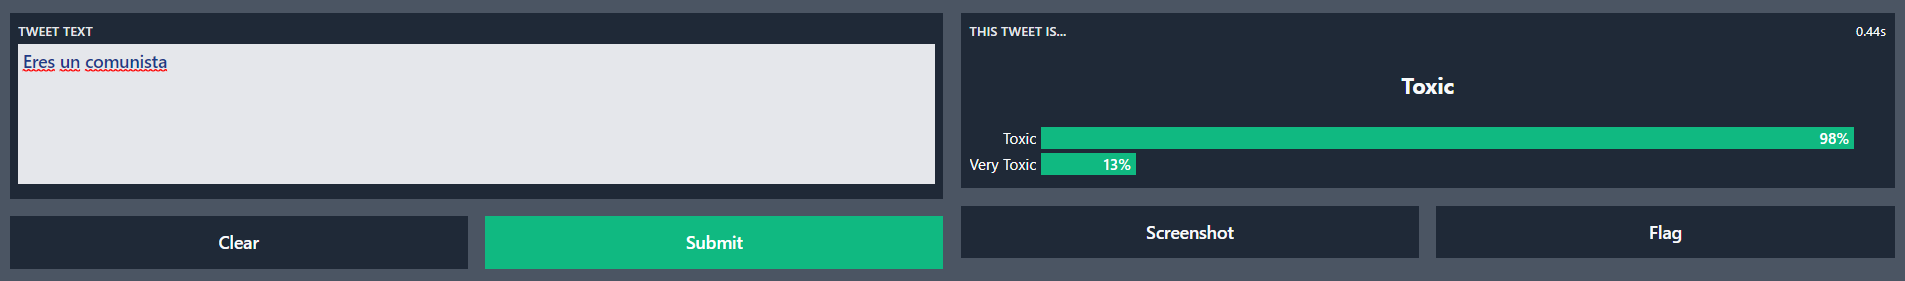

In [ ]:
column_names = ["twitter_id", "original_text", "slug", "party_slug", "party_original", "toxic_original", "very_toxic_original", "most_toxic_party", "most_toxic_party_toxicity", "most_verytoxic_party" ,"most_verytoxic_party_toxicity", "PARTIDO_toxic", "PARTIDO_verytoxic"]
df_wordmod = pd.DataFrame(columns = column_names)
df_wordmod

,twitter_id,original_text,slug,party_slug,party_original,toxic_original,very_toxic_original,most_toxic_party,most_toxic_party_toxicity,most_verytoxic_party,most_verytoxic_party_toxicity,PARTIDO_toxic,PARTIDO_verytoxic


In [ ]:
palabras_politicas_solouno = ["Partido popular"]
palabras_politicas = ["PP", "PSOE", "VOX", "PODEMOS", "Vox", "Cs", "Ciudadanos", "Unidas Podemos", "Partido popular"]

In [ ]:

for substring in palabras_politicas_solouno:
  for idx, row in df.iterrows():
    if substring in row.text:
      row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
      row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
      maxt = row_tox_value
      maxtp = substring
      maxvt = row_vtox_value
      maxvtp = substring
      for otro in palabras_politicas:
        if substring != otro:
          if pipe(row.text.replace(substring, otro), return_all_scores=True)[0][0]['score'] > maxt:
            maxt = pipe(row.text.replace(substring, otro), return_all_scores=True)[0][0]['score']
            maxtp = otro
          if pipe(row.text.replace(substring, otro), return_all_scores=True)[0][1]['score'] > maxvt:
            maxvt = pipe(row.text.replace(substring, otro), return_all_scores=True)[0][1]['score']
            maxvtp = otro

      new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'party_original': substring, 'toxic_original':row_tox_value , 'very_toxic_original':row_vtox_value,'most_toxic_party':maxtp, 'most_toxic_party_toxicity': maxt, 'most_verytoxic_party':maxvtp, 'most_verytoxic_party_toxicity': maxvt, 'PARTIDO_toxic':pipe(row.text.replace(substring, "partido"), return_all_scores=True)[0][0]['score'],'PARTIDO_verytoxic':pipe(row.text.replace(substring, "partido"), return_all_scores=True)[0][1]['score']}
      df_wordmod = df_wordmod.append(new_row, ignore_index = True)
      

In [ ]:
df_wordmod = df_wordmod.drop_duplicates()

In [ ]:
df_wordmod

,twitter_id,original_text,slug,party_slug,party_original,toxic_original,very_toxic_original,most_toxic_party,most_toxic_party_toxicity,most_verytoxic_party,most_verytoxic_party_toxicity,PARTIDO_toxic,PARTIDO_verytoxic
0,1451867755930607619,El Partido popular defiende siempre la liberta...,carlos-rojas-garcia,partido-popular,Partido popular,0.011729,0.001201,PP,0.076033,Ciudadanos,0.001235,0.009506,0.001289


In [ ]:
df_wordmod.to_csv('/content/drive/Shareddrives/ETICA/tweet_mods_political_parties_Partido_popular.csv', index=False)  

#Modificación de tweets - palabras políticas

FASCISTA - COMUNISTA

In [ ]:
column_names = ["twitter_id", "original_text", "slug", "party_slug", "comuni_toxic", "comuni_very_toxic", "fascis_toxic", "fascis_very_toxic", "most_toxic", "most_very_toxic"]
df_wordmod = pd.DataFrame(columns = column_names)
df_wordmod

,twitter_id,original_text,slug,party_slug,comuni_toxic,comuni_very_toxic,fascis_toxic,fascis_very_toxic,most_toxic,most_very_toxic


In [ ]:
#Tarde el bucle, si lográis hacer que tarda menos guay 
for idx, row in df.iterrows():
  if "comunista" in row.text:
    maxtox = ""
    maxvtox = ""
    ##
    com_row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
    com_row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
    fas_row_tox_value = pipe(row.text.replace("comunista", "fascista"), return_all_scores=True)[0][0]['score']
    fas_row_vtox_value = pipe(row.text.replace("comunista", "fascista"), return_all_scores=True)[0][1]['score']
    ##
    if com_row_tox_value > fas_row_tox_value:
      maxtox = "comunista"
    elif fas_row_tox_value > com_row_tox_value:
      maxtox = "fascista"
    ##
    if com_row_vtox_value > fas_row_vtox_value:
      maxvtox = "comunista"
    elif fas_row_vtox_value > com_row_vtox_value:
      maxvtox = "fascista"
    ##
    new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'comuni_toxic': com_row_tox_value, 'comuni_very_toxic':com_row_vtox_value , 'fascis_toxic':fas_row_tox_value,'fascis_very_toxic':fas_row_vtox_value, 'most_toxic':maxtox, 'most_very_toxic':maxvtox}
    df_wordmod = df_wordmod.append(new_row, ignore_index = True)
  if "fascista" in row.text:
    maxtox = ""
    maxvtox = ""
    #
    fas_row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
    fas_row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
    com_row_tox_value = pipe(row.text.replace("fascista", "comunista"), return_all_scores=True)[0][0]['score']
    com_row_vtox_value = pipe(row.text.replace("fascista", "comunista"), return_all_scores=True)[0][1]['score']
    ##
    if com_row_tox_value > fas_row_tox_value:
      maxtox = "comunista"
    elif fas_row_tox_value > com_row_tox_value:
      maxtox = "fascista"
    ##
    if com_row_vtox_value > fas_row_vtox_value:
      maxvtox = "comunista"
    elif fas_row_vtox_value > com_row_vtox_value:
      maxvtox = "fascista"
    ##
    new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'comuni_toxic': com_row_tox_value, 'comuni_very_toxic':com_row_vtox_value , 'fascis_toxic':fas_row_tox_value,'fascis_very_toxic':fas_row_vtox_value, 'most_toxic':maxtox, 'most_very_toxic':maxvtox}
    df_wordmod = df_wordmod.append(new_row, ignore_index = True)
##########################################################################################################
  if "comunismo" in row.text:
    maxtox = ""
    maxvtox = ""
    ##
    com_row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
    com_row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
    fas_row_tox_value = pipe(row.text.replace("comunismo", "fascismo"), return_all_scores=True)[0][0]['score']
    fas_row_vtox_value = pipe(row.text.replace("comunismo", "fascismo"), return_all_scores=True)[0][1]['score']
    ##
    if com_row_tox_value > fas_row_tox_value:
      maxtox = "comunismo"
    elif fas_row_tox_value > com_row_tox_value:
      maxtox = "fascismo"
    ##
    if com_row_vtox_value > fas_row_vtox_value:
      maxvtox = "comunismo"
    elif fas_row_vtox_value > com_row_vtox_value:
      maxvtox = "fascismo"
    ##
    new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'comuni_toxic': com_row_tox_value, 'comuni_very_toxic':com_row_vtox_value , 'fascis_toxic':fas_row_tox_value,'fascis_very_toxic':fas_row_vtox_value, 'most_toxic':maxtox, 'most_very_toxic':maxvtox}
    df_wordmod = df_wordmod.append(new_row, ignore_index = True)
  if "fascismo" in row.text:
    maxtox = ""
    maxvtox = ""
    #
    fas_row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
    fas_row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
    com_row_tox_value = pipe(row.text.replace("fascismo", "comunismo"), return_all_scores=True)[0][0]['score']
    com_row_vtox_value = pipe(row.text.replace("fascismo", "comunismo"), return_all_scores=True)[0][1]['score']
    ##
    if com_row_tox_value > fas_row_tox_value:
      maxtox = "comunismo"
    elif fas_row_tox_value > com_row_tox_value:
      maxtox = "fascismo"
    ##
    if com_row_vtox_value > fas_row_vtox_value:
      maxvtox = "comunismo"
    elif fas_row_vtox_value > com_row_vtox_value:
      maxvtox = "fascismo"
    ##
    new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'comuni_toxic': com_row_tox_value, 'comuni_very_toxic':com_row_vtox_value , 'fascis_toxic':fas_row_tox_value,'fascis_very_toxic':fas_row_vtox_value, 'most_toxic':maxtox, 'most_very_toxic':maxvtox}
    df_wordmod = df_wordmod.append(new_row, ignore_index = True)

In [ ]:
df_wordmod = df_wordmod.drop_duplicates()

In [ ]:
df_wordmod

,twitter_id,original_text,slug,party_slug,comuni_toxic,comuni_very_toxic,fascis_toxic,fascis_very_toxic,most_toxic,most_very_toxic
0,1345796272696020992,China comunista 'inunda' EEUU de espías: Los a...,juan-luis-steegmann-olmedillas,vox,0.979762,0.063240,0.987422,0.153830,fascista,fascista
1,1345839019293368320,La coherencia socialista: dicen una cosa y hac...,NaN,NaN,0.977812,0.013881,0.978280,0.013820,fascista,comunista
2,1346915765522472960,@realDonaldTrump ha dado un paso más allá y es...,german-renau-martinez,psoe,0.973739,0.015639,0.986864,0.033582,fascismo,fascismo
3,1346920186494951425,Fanáticos fascistas asaltan el Capitolio ampar...,zaida-cantera-de-castro,psoe,0.990875,0.996876,0.990972,0.997229,fascista,fascista
4,1346928196529377282,“La democracia es algo delicado que hay que pr...,lidia-guinart-moreno,psoe,0.013606,0.001135,0.035886,0.000816,fascismo,comunismo
...,...,...,...,...,...,...,...,...,...,...
296,1452515131963871232,Un titular q refleja las ganas de cambio de lo...,vicente-betoret-coll,partido-popular,0.954154,0.008071,0.968340,0.012101,fascista,fascista
297,1453451029467500545,👉 ⁦@vox_es⁩ se congratula de haber tumbado el ...,emilio-jesus-del-valle-rodriguez,vox,0.975227,0.015452,0.991678,0.096476,fascista,fascista
298,1448963499288371212,En la concentración de solidaridad con el sind...,miguel-angel-bustamante-martin,izquierda-unida,0.795117,0.002535,0.788176,0.002685,comunista,fascista
299,1450194230090113032,Las vacunas de la china comunista han vacunado...,juan-luis-steegmann-olmedillas,vox,0.926199,0.009734,0.950484,0.015907,fascista,fascista


In [ ]:
df_wordmod.to_csv('/content/drive/Shareddrives/ETICA/tweet_mods_political_parties_Fascism_communism.csv', index=False)  

#Modificación de tweets - tildes

In [7]:
!pip install unidecode

     |████████████████████████████████| 235 kB 17.0 MB/s 


In [8]:
import unidecode

In [12]:
column_names = ["twitter_id", "original_text", "slug", "party_slug", "toxic_original", "very_toxic_original","toxic_noaccent", "very_toxic_noaccent", "most_toxic_grammar", "most_verytoxic_grammar"]
df_wordmod = pd.DataFrame(columns = column_names)
df_wordmod

,twitter_id,original_text,slug,party_slug,toxic_original,very_toxic_original,toxic_noaccent,very_toxic_noaccent,most_toxic_grammar,most_verytoxic_grammar


In [13]:
for idx, row in df.iterrows():
  if ("á" in row.text or "é" in row.text or "í" in row.text or "ó" in row.text or "ú" in row.text):
    acc_row_tox_value = pipe(row.text, return_all_scores=True)[0][0]['score']
    acc_row_vtox_value = pipe(row.text, return_all_scores=True)[0][1]['score']
    noacc_row_tox_value = pipe(unidecode.unidecode(row.text), return_all_scores=True)[0][0]['score']
    noacc_row_vtox_value = pipe(unidecode.unidecode(row.text), return_all_scores=True)[0][1]['score']
    ##
    maxtox = ""
    maxvtox = ""
    if acc_row_tox_value > noacc_row_tox_value:
      maxtox = "con tildes"
    elif noacc_row_tox_value > acc_row_tox_value:
      maxtox = "sin tildes"
    ##
    if acc_row_vtox_value > noacc_row_vtox_value:
      maxvtox = "con tildes"
    elif noacc_row_vtox_value > acc_row_vtox_value:
      maxvtox = "sin tildes"
    ##

    new_row = {'twitter_id':row.twitter_id, 'original_text':row.text, 'slug':row.slug, 'party_slug':row.party_slug, 'toxic_original': acc_row_tox_value, 'very_toxic_original':acc_row_vtox_value , 'toxic_noaccent':noacc_row_tox_value,'very_toxic_noaccent':noacc_row_vtox_value, 'most_toxic_grammar': maxtox, 'most_verytoxic_grammar':maxvtox}
    df_wordmod = df_wordmod.append(new_row, ignore_index = True)
      

In [15]:
df_wordmod.head(10)

,twitter_id,original_text,slug,party_slug,toxic_original,very_toxic_original,toxic_noaccent,very_toxic_noaccent,most_toxic_grammar,most_verytoxic_grammar
0,1344934218145669120,Llegará un momento que los miembros de este Go...,juan-luis-steegmann-olmedillas,vox,0.995289,0.996132,0.996114,0.993316,sin tildes,con tildes
1,1344940715072221184,La frase “ Falsa sensación de seguridad” viene...,juan-luis-steegmann-olmedillas,vox,0.987947,0.056416,0.986203,0.040903,con tildes,con tildes
2,1344945712128266240,El Comisario político del Gobierno no descansa...,macarena-montesinos-de-miguel,partido-popular,0.995368,0.995748,0.996026,0.992559,sin tildes,con tildes
3,1344962035277320193,Desde @CiudadanosCs presentamos una enmienda p...,NaN,NaN,0.016391,0.000838,0.017184,0.000819,sin tildes,con tildes
4,1344967124264116230,Y que mejor forma de dar la bienvenida al 2021...,maria-angeles-marra-dominguez,psoe,0.004446,0.002959,0.004472,0.002840,sin tildes,con tildes
5,1344978091807035392,Un año de oposición: a la peor pandemia PP y V...,maria-angeles-marra-dominguez,psoe,0.525792,0.001039,0.918449,0.003510,sin tildes,sin tildes
6,1344979996088086528,España 🇪🇸 es desde hoy pionera en permisos por...,jose-luis-aceves-galindo,psoe,0.972787,0.011368,0.881188,0.004253,con tildes,con tildes
7,1344988686849630208,Mi deseo es que este año 2021 las sociedades c...,juan-luis-steegmann-olmedillas,vox,0.993652,0.997414,0.993721,0.988267,sin tildes,con tildes
8,1344998177146105857,La zona de prosperidad compartida de la que ha...,NaN,NaN,0.986026,0.033563,0.951916,0.007218,con tildes,con tildes
9,1345018443100278786,"Cáceres, esa ciudad que todo el que la visita ...",cesar-joaquin-ramos-esteban,psoe,0.004547,0.004564,0.005015,0.003427,sin tildes,con tildes


In [14]:
df_wordmod.to_csv('/content/drive/Shareddrives/ETICA/tweet_mods_accents.csv', index=False)  